In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
import requests
import math

# Questão 5


## 5.1

In [ ]:
def funcV():
  ksum = 0
  k = 0 #guarda o número de elementos somados até satisfazer a condição
  while ksum < 1:
    ksum += np.random.uniform(0,1)
    k+=1
  return k
print([funcV() for i in range(10)])

[2, 3, 3, 2, 2, 2, 2, 2, 3, 4]


## 5.2

In [ ]:
import numpy as np
def E_V(N, print_array=False):
  results = [funcV() for i in range(N)] # gera N amostras de V e guarda num vetor
  if print_array:
    return np.average(results), results # o vetor "results" será utilizado na próxima 
                                        # questão e guarda todas as amostras geradas de V
  else:
    return np.average(results) # retorna a média do vetor, isto é, a soma de 
                               # todas as amostras, dividido por n

n=10**5
E_V(n)

2.71829

## 5.3

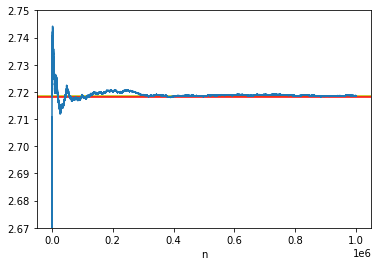

In [ ]:
import matplotlib.pyplot as plt

n=10**6
value, array = E_V(n,True)
sum_array, temp = [], 0
for p,i in enumerate(array):
  temp+=i
  sum_array.append(temp/(p+1))

fig, ax = plt.subplots()
plt.axhline(y=value, color ='y')
plt.axhline(y=np.e, color ='r')
ax.plot(range(0,len(sum_array)),sum_array)
plt.xlabel('n')
plt.ylim([2.67,2.75])
plt.show()

# Questão 7


## 7.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import string
import requests
from requests.api import head
import math
import multiprocessing as mp

alphabet = list(string.ascii_lowercase)

def generate_letters_sequence(j): #função para gerar sequencias de letras com tamanho j
  letters = ''
  for i in range(j):
    letters+= alphabet[np.random.randint(0,len(alphabet)-1)]
  return letters

def n_domains_with_k_letters(k): # retorna a quantidade de possibilidades de dominios com k letras
  return len(alphabet)**k

def n_domains_with_k_letters_or_less(k): # retorna a quantidade de possibilidades de dominios com k letras ou menos
  return sum(n_domains_with_k_letters(i) for i in range(1,k+1))

def generate_domains_sample(n, k): # gera n amostras de possíveis domínios com k letras ou menos
  n_of_all_possible_domains = n_domains_with_k_letters_or_less(k) # quantidade de possibilidades de dominios com k letras ou menos
  domains_generated = [None]*n # vetor que irá guardar todas as amostras de domínio geradas
  vector_pick_number_of_letters = [None]*n_of_all_possible_domains #vetor para auxiliar a escolha do número de letras de modo uniforme
  for i in range(1,k+1): # define as quantidades proporcionais de possibilidades de domínios no vetor acima para cada numero de letras
    vector_pick_number_of_letters[n_domains_with_k_letters_or_less(i-1):n_domains_with_k_letters_or_less(i)] = [i]*(n_domains_with_k_letters_or_less(i) - n_domains_with_k_letters_or_less(i-1))
  for i in range(n): # gera propriamente as amostras usando os vetores e funções criados acima
    j = np.random.randint(0,n_of_all_possible_domains-1) # escolhe um numero dentre todas as possibilidades de domínios de modo uniforme
    j = vector_pick_number_of_letters[j] # ajusta o j para o valor de letras escolhido
    domains_generated[i] = 'http://www.'+generate_letters_sequence(j)+'.ufrj.br' #guarda o domínio gerado no vetor
  return domains_generated # retorna o vetor com  todos os domínios gerados
def check_if_domain_in_use(url): # verifica se a url representa um domínio que está sendo utilizado
  valid_domain=0
  try:
    with head(url, stream=True) as r:
      if r.status_code==200:
        valid_domain=1 # somente se está sendo utilizada, retorna 1
  except requests.ConnectionError:
    pass
  return valid_domain

def get_estimate_in_use_domains(n, k): # função para estimar o valor de domínios utilizados com k letras ou menos a partir de n amostras 
  total_in_use_domains = 0
  domains_checked = []
  n_of_all_possible_domains = n_domains_with_k_letters_or_less(k)
  domains = generate_domains_sample(n,k) # chama a função para gerar os domínios

  with mp.Pool(processes=500) as a_pool:
    domains_checked = a_pool.map(check_if_domain_in_use,domains) # verifica os domínios de forma assíncrona

  return n_of_all_possible_domains*np.sum(domains_checked)/n, domains_checked # retorna a estimativa de domínios sendo utilizados


estimate, domain_per_iter = get_estimate_in_use_domains(10**5,4) # chama a função para estimar o valor de domínios utilizados

In [ ]:
print(estimate)
print(domain_per_iter)
print(sum(domain_per_iter))

38.02032
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

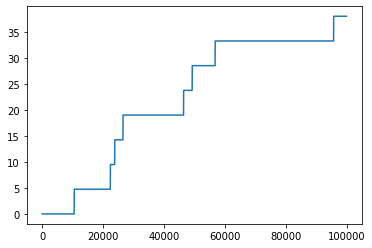

In [ ]:
import matplotlib.pyplot as plt
k=4
n=10**5
n_of_all_possible_domains = n_domains_with_k_letters_or_less(k)

acc_estim_domains = []
s=0
for i,d in enumerate(domain_per_iter):
  s+=d
  acc_estim_domains.append(n_of_all_possible_domains*s/n)

fig, ax = plt.subplots()
ax.plot(range(0,len(acc_estim_domains)),acc_estim_domains)
plt.show()

# Questão 8

## Questão 8.1

(array([ 2.,  0.,  1.,  0.,  4.,  0.,  0.,  3.,  5.,  0.,  8.,  2.,  6.,
         0.,  7.,  9.,  0.,  6., 10.,  0.,  6., 14., 10.,  0., 14., 13.,
         0., 20., 21.,  0., 25., 17., 29.,  0., 22., 24.,  0., 29., 23.,
         0., 22., 27., 27.,  0., 34., 17.,  0., 29., 46.,  0., 36., 25.,
        29.,  0., 38., 31.,  0., 33., 28.,  0., 26., 26., 14.,  0., 14.,
        23.,  0., 24., 13.,  0., 12.,  9., 13.,  0.,  8., 11.,  0.,  8.,
        10.,  0.,  6.,  7.,  6.,  0.,  5.,  3.,  0.,  6.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([166. , 166.7, 167.4, 168.1, 168.8, 169.5, 170.2, 170.9, 171.6,
        172.3, 173. , 173.7, 174.4, 175.1, 175.8, 176.5, 177.2, 177.9,
        178.6, 179.3, 180. , 180.7, 181.4, 182.1, 182.8, 183.5, 184.2,
        184.9, 185.6, 186.3, 187. , 187.7, 188.4, 189.1, 189.8, 190.5,
        191.2, 191.9, 192.6, 193.3, 194. , 194.7, 195.4, 196.1, 196.8,
        197.5, 198.2, 198.9, 199.6, 200.3, 201. , 201.7, 202.4, 203.1,
        

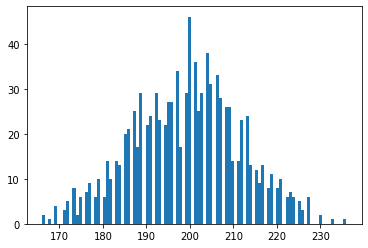

In [ ]:
b=np.random.binomial(n=1000,p=0.2,size=1000)
plt.hist(x=b,bins=100)

In [ ]:
from math import factorial
from numpy.random import uniform, randint

def f(x,n,p):
  return (p**x) * ((1-p)**(n-x)) * (factorial(n) / (factorial(x)*factorial(n-x)))
def g(x=1): 
  return 1
def generate_binom_sample(N,n,p):
  result = []
  max = n*p
  c = f(max, n,p)/g()
  n_tries=0
  for i in range(N):
    keep_trying=True
    while keep_trying:
      n_tries+=1
      x = randint(0,1000)
      u = uniform(0,c*g())
      if u<f(x,n,p):
        result.append(x)
        keep_trying=False
  efficiency = N/n_tries
  print(n_tries)
  return result, efficiency

n=1000
p=0.2
r,e = generate_binom_sample(1000, n, p)
print(r)
print(e)

32700
[194, 201, 209, 213, 196, 232, 197, 192, 189, 221, 188, 185, 204, 200, 203, 204, 193, 193, 177, 205, 201, 211, 198, 182, 196, 194, 206, 181, 200, 198, 184, 202, 193, 190, 187, 201, 217, 211, 177, 198, 184, 228, 203, 171, 195, 194, 202, 200, 200, 199, 226, 185, 197, 192, 211, 184, 201, 217, 205, 185, 191, 219, 200, 203, 202, 184, 203, 193, 180, 235, 225, 202, 188, 193, 185, 207, 224, 182, 205, 183, 207, 194, 191, 194, 187, 177, 170, 205, 188, 214, 189, 199, 225, 200, 196, 201, 215, 210, 194, 203, 211, 214, 214, 174, 218, 195, 187, 208, 213, 218, 195, 160, 209, 216, 197, 196, 190, 176, 217, 209, 191, 197, 212, 193, 193, 186, 187, 179, 186, 196, 209, 204, 206, 191, 189, 222, 191, 195, 185, 202, 218, 219, 221, 209, 205, 212, 190, 207, 191, 204, 194, 196, 222, 211, 192, 199, 197, 186, 199, 210, 194, 201, 222, 208, 219, 219, 175, 189, 202, 218, 223, 191, 214, 183, 191, 224, 237, 200, 183, 213, 200, 181, 195, 199, 215, 222, 187, 209, 200, 198, 187, 197, 193, 193, 216, 214, 202, 202, 207

(array([ 2.,  1.,  0.,  0.,  0.,  4.,  2.,  0.,  2.,  1.,  4.,  0.,  4.,
         2.,  4.,  0., 13.,  7.,  7.,  0., 11.,  9.,  9.,  0., 12., 19.,
        12.,  0., 18., 17., 16.,  0., 16., 16., 25.,  0., 28., 26., 32.,
         0., 26., 26., 45.,  0., 29., 30., 25.,  0., 38., 34., 28.,  0.,
        29., 31., 30.,  0., 19., 24., 21.,  0., 17., 34., 25.,  0., 18.,
        20., 13.,  0., 14., 11., 13.,  0., 12., 12.,  7.,  0.,  5.,  5.,
         5.,  0.,  8.,  4.,  5.,  0.,  0.,  4.,  2.,  0.,  1.,  3.,  2.,
         0.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  1.]),
 array([165.  , 165.75, 166.5 , 167.25, 168.  , 168.75, 169.5 , 170.25,
        171.  , 171.75, 172.5 , 173.25, 174.  , 174.75, 175.5 , 176.25,
        177.  , 177.75, 178.5 , 179.25, 180.  , 180.75, 181.5 , 182.25,
        183.  , 183.75, 184.5 , 185.25, 186.  , 186.75, 187.5 , 188.25,
        189.  , 189.75, 190.5 , 191.25, 192.  , 192.75, 193.5 , 194.25,
        195.  , 195.75, 196.5 , 197.25, 198.  , 198.75, 199.5 , 200.25,
  

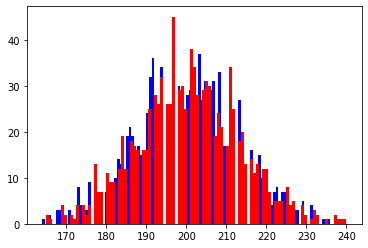

In [ ]:
plt.hist(x=r,bins=100,color='b')
b=np.random.binomial(n=1000,p=0.2,size=1000)
plt.hist(x=b,bins=100,color='r')

In [ ]:
from math import factorial
from numpy.random import uniform, randint

def f(x,n,p):
  return (p**x) * ((1-p)**(n-x)) * (factorial(n) / (factorial(x)*factorial(n-x)))
def h(x):
  if x>=200:
    return -0.00005*x + 0.05
  else:
    return 0.0002*x
def generate_binom_sample(N,n,p):
  result = []
  max_f = n*p
  c = f(max_f, n,p)/h(200)
  print(c)
  n_tries=0
  for i in range(N):
    keep_trying=True
    while keep_trying:
      n_tries+=1
      x = randint(0,1000)
      u = uniform(0,c*h(x))
      if u<f(x,n,p):
        result.append(x)
        keep_trying=False
  efficiency = N/n_tries
  print(n_tries)
  return result, efficiency

n=1000
p=0.2
r,e = generate_binom_sample(1000, n, p)
print(r)
print(e)

0.7881340293314838
28470
[216, 187, 193, 194, 192, 186, 204, 181, 212, 217, 203, 0, 207, 0, 211, 224, 201, 199, 176, 197, 211, 217, 205, 184, 226, 211, 224, 199, 196, 187, 200, 223, 224, 195, 199, 0, 194, 184, 213, 213, 0, 189, 193, 201, 211, 208, 208, 203, 195, 183, 200, 220, 175, 185, 0, 200, 186, 178, 211, 174, 228, 167, 212, 216, 193, 214, 215, 183, 187, 193, 220, 206, 187, 192, 201, 188, 197, 195, 203, 194, 186, 212, 168, 207, 0, 204, 188, 197, 178, 200, 0, 180, 193, 204, 179, 207, 196, 198, 205, 198, 197, 188, 185, 210, 197, 205, 195, 195, 205, 204, 196, 205, 193, 183, 0, 212, 184, 178, 198, 187, 204, 180, 191, 185, 191, 0, 202, 216, 208, 197, 194, 195, 203, 204, 196, 234, 187, 185, 186, 196, 201, 183, 228, 164, 211, 198, 199, 184, 207, 180, 179, 222, 215, 225, 200, 198, 192, 204, 193, 223, 218, 199, 191, 213, 195, 190, 180, 200, 207, 0, 214, 221, 196, 213, 185, 198, 192, 177, 197, 198, 184, 205, 217, 207, 198, 206, 207, 208, 198, 196, 0, 188, 238, 229, 204, 203, 196, 198, 202, 2

In [ ]:
plt.hist(x=r,bins=100,color='b')
b=np.random.binomial(n=1000,p=0.2,size=1000)
plt.hist(x=b,bins=100,color='r')

# Questão 9

## Questão 9.1

In [ ]:
import numpy as np
def g(n):
  s = uniform(0,1,n)
  return np.sum(np.e**(-s**2))/n
    
g(10**6)

0.7473205076932825

## Questão 9.2

In [ ]:
import math
import numpy as np
from numpy.random import uniform
from numpy import e

def sample_h(u):
  return np.log(e/(e-u*(e-1)))

def h(x):
  return e/((e-1)*(e**x))

def g2(n):
  u = uniform(0,1,n)
  samples = sample_h(u)
  result = np.exp(-samples**2)/h(samples)
  return np.sum(result)/n

g2(10**6)

0.7468564160933012

## Questão 9.3

(0.0, 0.005)

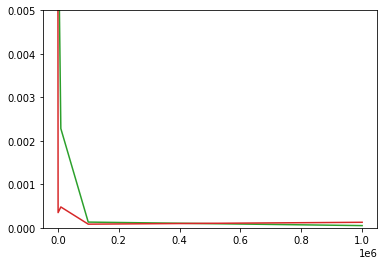

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
real_value = 0.7468241328124270253994674361318530053544996868126063290276544989
points = [10**i for i in range(7)]
y_g = []
y_g2 = []
for i in points:
  y_g.append(g(i))
  y_g2.append(g2(i))
e_g = [abs((i - real_value)/real_value) for i in y_g]
e_g2 = [abs((i - real_value)/real_value) for i in y_g2]

ax.plot(points,y_g)
ax.plot(points,y_g2)
ax.plot(points,e_g)
ax.plot(points,e_g2)
ax.set_ylim(0,0.005)